In [1]:
import numpy as np  
import pandas as pd 
import cv2 
import matplotlib.pyplot as plt 
from PIL import Image 
from tensorflow.keras import layers 
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img 
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Conv2D, MaxPooling2D 
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense 
from tensorflow.keras.optimizers import Adam 
import tensorflow as tf 
import os

In [2]:
base_dir = 'flowers'
  
img_size = 224
batch = 64

In [3]:
train_datagen = ImageDataGenerator(rescale=1. / 255, shear_range=0.2,  
                                   zoom_range=0.2, horizontal_flip=True, 
                                   validation_split=0.2) 
  
test_datagen = ImageDataGenerator(rescale=1. / 255, 
                                  validation_split=0.2) 
  
# Create datasets 
train_datagen = train_datagen.flow_from_directory(base_dir, 
                                                  target_size=( 
                                                      img_size, img_size), 
                                                  subset='training', 
                                                  batch_size=batch) 
test_datagen = test_datagen.flow_from_directory(base_dir, 
                                                target_size=( 
                                                    img_size, img_size), 
                                                subset='validation', 
                                                batch_size=batch) 

Found 3457 images belonging to 5 classes.
Found 860 images belonging to 5 classes.


In [4]:
# # modelling starts using a CNN. 
  
model = Sequential() 
model.add(Conv2D(filters=64, kernel_size=(5, 5), padding='same', 
                 activation='relu', input_shape=(224, 224, 3))) 
model.add(MaxPooling2D(pool_size=(2, 2))) 
  
  
model.add(Conv2D(filters=64, kernel_size=(3, 3), 
                 padding='same', activation='relu')) 
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2))) 
  
  
model.add(Conv2D(filters=64, kernel_size=(3, 3), 
                 padding='same', activation='relu')) 
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2))) 
  
model.add(Conv2D(filters=64, kernel_size=(3, 3), 
                 padding='same', activation='relu')) 
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2))) 
  
model.add(Flatten()) 
model.add(Dense(512)) 
model.add(Activation('relu')) 
model.add(Dense(5, activation="softmax")) 

In [5]:

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 64)      4864      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 64)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 64)      36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 28, 28, 64)       0

In [6]:
tf.keras.utils.plot_model( 
    model, 
    show_shapes = True, 
    show_dtype = True, 
    show_layer_activations = True
)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [7]:
model.compile(optimizer=tf.keras.optimizers.Adam(), 
			loss='categorical_crossentropy', metrics=['accuracy']) 


In [8]:
epochs=5
model.fit(train_datagen,epochs=epochs,validation_data=test_datagen)


Epoch 1/5
55/55 [==============================] - 517s 9s/step - loss: 1.3814 - accuracy: 0.3795 - val_loss: 1.1430 - val_accuracy: 0.5465
Epoch 2/5
55/55 [==============================] - 414s 7s/step - loss: 1.0861 - accuracy: 0.5794 - val_loss: 1.0926 - val_accuracy: 0.5570
Epoch 3/5
55/55 [==============================] - 362s 7s/step - loss: 0.9912 - accuracy: 0.6205 - val_loss: 1.0742 - val_accuracy: 0.5686
Epoch 4/5
55/55 [==============================] - 329s 6s/step - loss: 1.0635 - accuracy: 0.5832 - val_loss: 1.0178 - val_accuracy: 0.6081
Epoch 5/5
55/55 [==============================] - 323s 6s/step - loss: 0.9475 - accuracy: 0.6315 - val_loss: 0.9573 - val_accuracy: 0.6314


In [9]:
from tensorflow.keras.models import load_model 
model.save('Model.h5') 

# load model 
savedModel=load_model('Model.h5')


In [10]:
train_datagen.class_indices


{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

1/1 [==============================] - 0s 403ms/step
[[0. 0. 1. 0. 0.]]
Rose


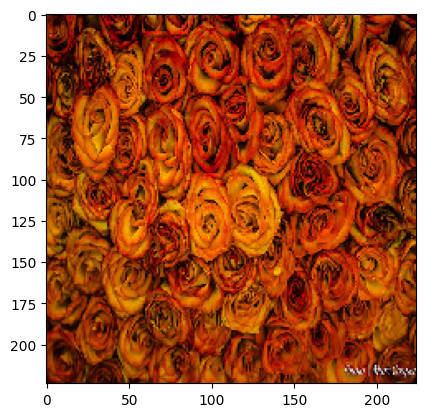

In [15]:
from tensorflow.keras.preprocessing import image 

#Creating list for mapping 
list_ = ['Daisy','Danelion','Rose','sunflower', 'tulip'] 

#Input image 
test_image = image.load_img('rose.jpg',target_size=(224,224)) 

#For show image 
plt.imshow(test_image) 
test_image = image.img_to_array(test_image) 
test_image = np.expand_dims(test_image,axis=0) 

# Result array 
result = savedModel.predict(test_image) 
print(result) 

#Mapping result array with the main name list 
i=0
for i in range(len(result[0])): 
	if(result[0][i]==1): 
		print(list_[i]) 
		break


1/1 [==============================] - 0s 64ms/step
[[1. 0. 0. 0. 0.]]
Daisy


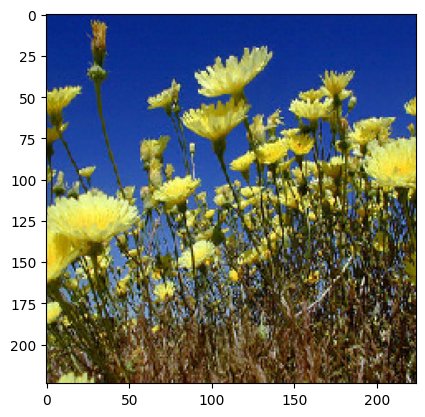

In [16]:
#Input image 
test_image = image.load_img('dandelion.jpg',target_size=(224,224)) 

#For show image 
plt.imshow(test_image) 
test_image = image.img_to_array(test_image) 
test_image = np.expand_dims(test_image,axis=0) 

# Result array 
result = savedModel.predict(test_image) 
print(result) 

#Mapping result array with the main name list 
i=0
for i in range(len(result[0])): 
	if(result[0][i]==1): 
		print(list_[i]) 
		break
